# 1. Data Preprocessing and Exploration

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv(r'deid-nicu-sepsis-tta.csv')

In [ ]:
df.head()

,episode_id,unique_patient_id,sex,race,gestational_age_at_birth_weeks,birth_weight_kg,sepsis_group,onset_age_in_days,onset_hour_of_day,blood_culture_positive,...,umbilical_arterial_line,ecmo,temp_celsius,length_of_stay_hours,comorbidity_necrotizing_enterocolitis,comorbidity_chronic_lung_disease,comorbidity_cardiac,comorbidity_surgical,comorbidity_ivh_or_shunt,period
0,1,1,0,3,23.0,0.40,1,7,9,1,...,1,0,37.6,216.0,0,0,0,0,1,Year 1
1,2,2,0,5,27.0,0.79,3,0,4,0,...,1,0,36.8,578.0,0,0,0,0,0,Year 1
2,3,2,0,5,27.0,0.79,1,23,9,1,...,0,0,36.9,578.0,0,0,0,0,0,Year 1
3,4,3,0,5,37.0,4.31,1,11,22,1,...,1,0,37.2,285.0,0,0,0,0,0,Year 1
4,5,4,1,5,39.0,4.17,2,3,17,0,...,1,0,36.2,783.0,0,0,0,0,0,Year 1


In [ ]:
df.describe()

,episode_id,unique_patient_id,sex,gestational_age_at_birth_weeks,birth_weight_kg,sepsis_group,onset_age_in_days,onset_hour_of_day,blood_culture_positive,positive_days,...,central_venous_line,umbilical_arterial_line,ecmo,temp_celsius,length_of_stay_hours,comorbidity_necrotizing_enterocolitis,comorbidity_chronic_lung_disease,comorbidity_cardiac,comorbidity_surgical,comorbidity_ivh_or_shunt
count,1946.000000,1946.000000,1946.000000,1931.000000,1894.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.0000,1946.000000,1942.000000,1838.000000,1946.00000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,491.026721,0.576567,32.336095,2.009187,2.521583,66.431655,10.560123,0.065776,0.112539,...,0.671120,0.1074,0.039568,37.527909,3119.958107,0.17369,0.301644,0.183453,0.341213,0.138746
std,561.906131,272.736848,0.494230,5.341832,1.121012,1.263201,70.165333,6.533421,0.247954,0.541517,...,0.469927,0.3097,0.194993,0.751275,2704.313906,0.37894,0.459090,0.387137,0.474239,0.345770
min,1.000000,1.000000,0.000000,22.000000,0.370000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,33.700000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,264.000000,0.000000,27.000000,0.880000,2.000000,10.000000,5.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,37.000000,1031.750000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,973.500000,481.500000,1.000000,34.000000,2.040000,2.000000,44.000000,10.000000,0.000000,0.000000,...,1.000000,0.0000,0.000000,37.300000,2237.500000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1459.750000,730.750000,1.000000,37.000000,2.950000,3.000000,105.750000,16.000000,0.000000,0.000000,...,1.000000,0.0000,0.000000,38.000000,4507.250000,0.00000,1.000000,0.000000,1.000000,0.000000
max,1946.000000,986.000000,1.000000,41.000000,5.950000,6.000000,335.000000,23.000000,1.000000,7.000000,...,1.000000,1.0000,1.000000,41.300000,14567.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(1946, 32)

In [ ]:
df.dtypes

episode_id                                  int64
unique_patient_id                           int64
sex                                         int64
race                                       object
gestational_age_at_birth_weeks            float64
birth_weight_kg                           float64
sepsis_group                                int64
onset_age_in_days                           int64
onset_hour_of_day                           int64
blood_culture_positive                      int64
positive_days                               int64
cx_site                                   float64
time_to_antibiotics                         int64
stat_abx                                    int64
overall_mortality_within_7_days             int64
overall_mortality_within_14_days            int64
overall_mortality_within_30_days            int64
intubated_at_time_of_sepsis_evaluation      int64
intubated_free_days                         int64
inotrope_at_time_of_sepsis_eval             int64


## One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['race'] = LE.fit_transform(df['race'])
df['period'] = LE.fit_transform(df['period'])

In [ ]:
df.dtypes

episode_id                                  int64
unique_patient_id                           int64
sex                                         int64
race                                        int32
gestational_age_at_birth_weeks            float64
birth_weight_kg                           float64
sepsis_group                                int64
onset_age_in_days                           int64
onset_hour_of_day                           int64
blood_culture_positive                      int64
positive_days                               int64
cx_site                                   float64
time_to_antibiotics                         int64
stat_abx                                    int64
overall_mortality_within_7_days             int64
overall_mortality_within_14_days            int64
overall_mortality_within_30_days            int64
intubated_at_time_of_sepsis_evaluation      int64
intubated_free_days                         int64
inotrope_at_time_of_sepsis_eval             int64


In [ ]:
df.head()

,episode_id,unique_patient_id,sex,race,gestational_age_at_birth_weeks,birth_weight_kg,sepsis_group,onset_age_in_days,onset_hour_of_day,blood_culture_positive,...,umbilical_arterial_line,ecmo,temp_celsius,length_of_stay_hours,comorbidity_necrotizing_enterocolitis,comorbidity_chronic_lung_disease,comorbidity_cardiac,comorbidity_surgical,comorbidity_ivh_or_shunt,period
0,1,1,0,3,23.0,0.40,1,7,9,1,...,1,0,37.6,216.0,0,0,0,0,1,0
1,2,2,0,4,27.0,0.79,3,0,4,0,...,1,0,36.8,578.0,0,0,0,0,0,0
2,3,2,0,4,27.0,0.79,1,23,9,1,...,0,0,36.9,578.0,0,0,0,0,0,0
3,4,3,0,4,37.0,4.31,1,11,22,1,...,1,0,37.2,285.0,0,0,0,0,0,0
4,5,4,1,4,39.0,4.17,2,3,17,0,...,1,0,36.2,783.0,0,0,0,0,0,0


# 2. Data Wrangling

### Handling Missing Data

In [ ]:
missing_data = df.isnull().sum()
missing_data

episode_id                                   0
unique_patient_id                            0
sex                                          0
race                                         0
gestational_age_at_birth_weeks              15
birth_weight_kg                             52
sepsis_group                                 0
onset_age_in_days                            0
onset_hour_of_day                            0
blood_culture_positive                       0
positive_days                                0
cx_site                                   1752
time_to_antibiotics                          0
stat_abx                                     0
overall_mortality_within_7_days              0
overall_mortality_within_14_days             0
overall_mortality_within_30_days             0
intubated_at_time_of_sepsis_evaluation       0
intubated_free_days                          0
inotrope_at_time_of_sepsis_eval              0
inotrope_free_days                           0
central_venou

In [ ]:
missing_percent = (missing_data/df.shape[0])*100
missing_percent

episode_id                                 0.000000
unique_patient_id                          0.000000
sex                                        0.000000
race                                       0.000000
gestational_age_at_birth_weeks             0.770812
birth_weight_kg                            2.672148
sepsis_group                               0.000000
onset_age_in_days                          0.000000
onset_hour_of_day                          0.000000
blood_culture_positive                     0.000000
positive_days                              0.000000
cx_site                                   90.030832
time_to_antibiotics                        0.000000
stat_abx                                   0.000000
overall_mortality_within_7_days            0.000000
overall_mortality_within_14_days           0.000000
overall_mortality_within_30_days           0.000000
intubated_at_time_of_sepsis_evaluation     0.000000
intubated_free_days                        0.000000
inotrope_at_

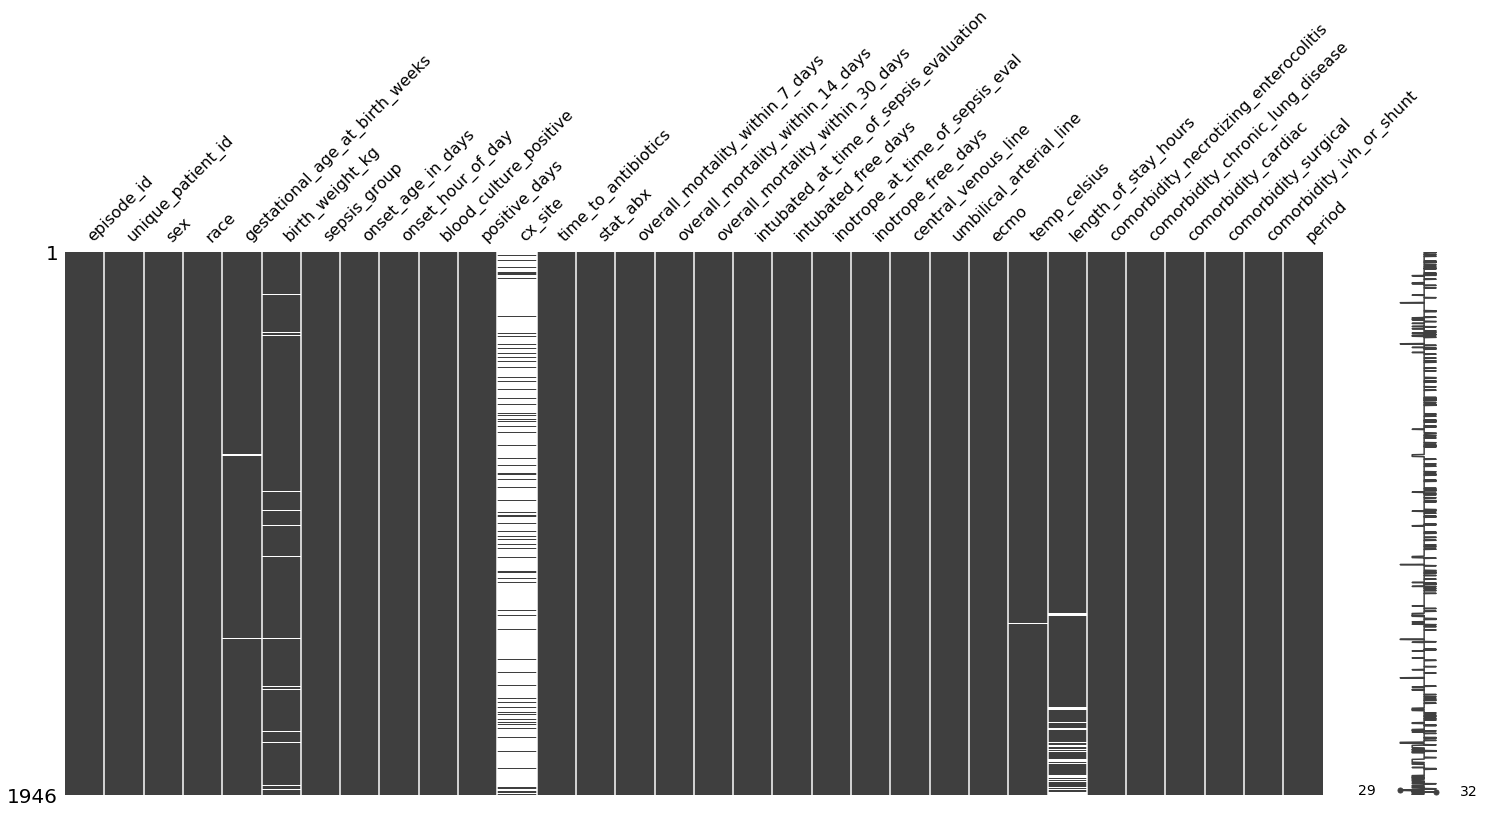

In [ ]:
import missingno as msno
msno.matrix(df)

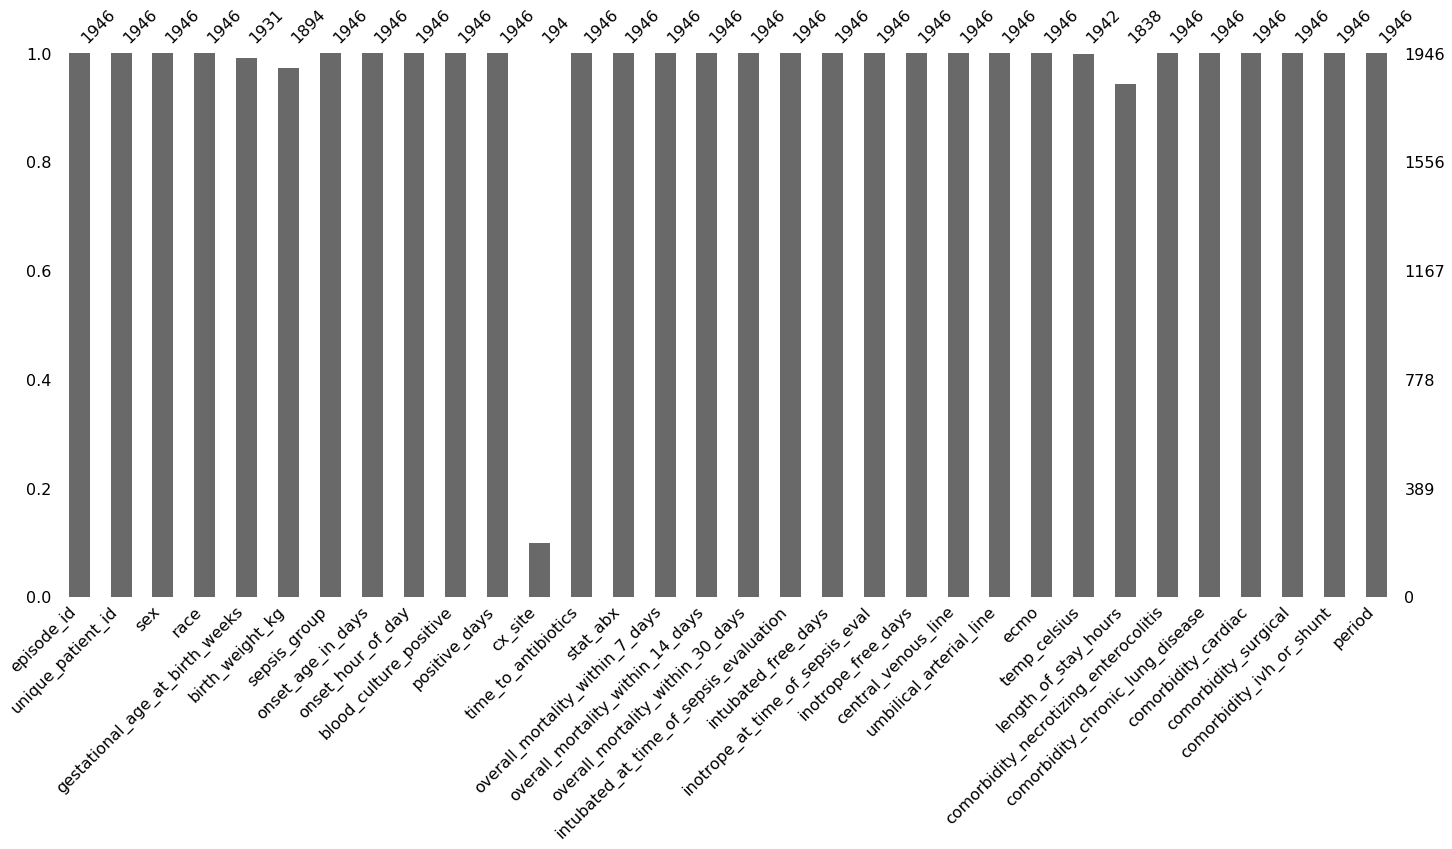

In [ ]:
msno.bar(df)

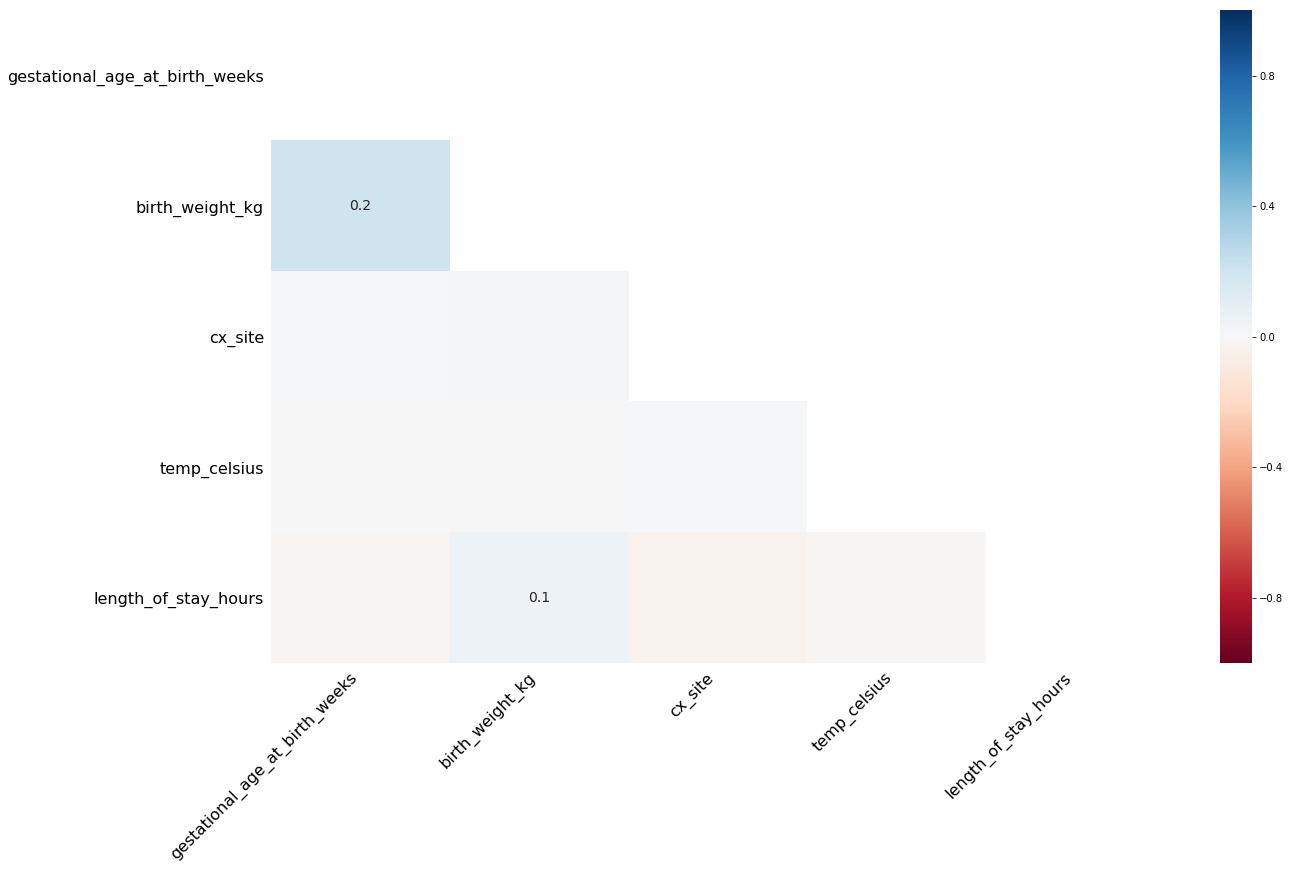

In [ ]:
msno.heatmap(df)

In [ ]:
df.drop('cx_site',
  axis='columns', inplace=True)

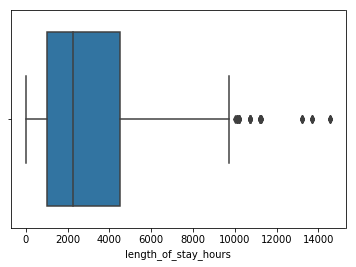

In [ ]:
sns.boxplot(x=df['length_of_stay_hours'])

## As there's outliers detected, we replace the missing values with the median

In [ ]:
df['length_of_stay_hours'].fillna(df['length_of_stay_hours'].median(), inplace=True)

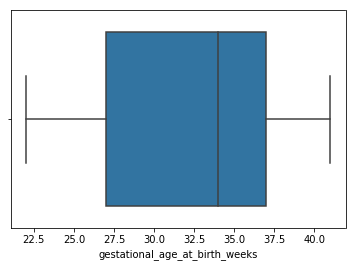

In [ ]:
sns.boxplot(x=df['gestational_age_at_birth_weeks'])

## As there's no outlier in the above plot, we replace the missing values with the columns mean

In [ ]:
df['gestational_age_at_birth_weeks'].fillna(df['gestational_age_at_birth_weeks'].mean(), inplace=True)

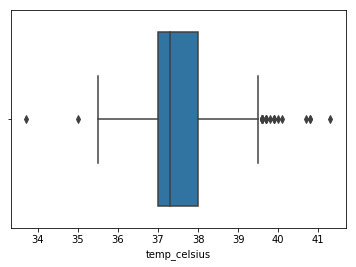

In [ ]:
sns.boxplot(x=df['temp_celsius'])

In [ ]:
df['temp_celsius'].fillna(df['temp_celsius'].median(), inplace=True)

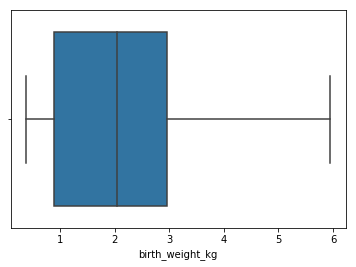

In [ ]:
sns.boxplot(x=df['birth_weight_kg'])

In [ ]:
df['birth_weight_kg'].fillna(df['birth_weight_kg'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

episode_id                                0
unique_patient_id                         0
sex                                       0
race                                      0
gestational_age_at_birth_weeks            0
birth_weight_kg                           0
sepsis_group                              0
onset_age_in_days                         0
onset_hour_of_day                         0
blood_culture_positive                    0
positive_days                             0
time_to_antibiotics                       0
stat_abx                                  0
overall_mortality_within_7_days           0
overall_mortality_within_14_days          0
overall_mortality_within_30_days          0
intubated_at_time_of_sepsis_evaluation    0
intubated_free_days                       0
inotrope_at_time_of_sepsis_eval           0
inotrope_free_days                        0
central_venous_line                       0
umbilical_arterial_line                   0
ecmo                            

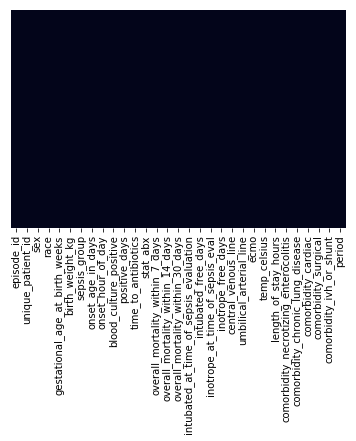

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

### Duplicate Values

In [ ]:
print(f"Number of duplicates in the data are {df.duplicated().sum()} of {len(df)}, ie {(100* df.duplicated().sum()/len(df)).round(2)} % of data duplicated")

Number of duplicates in the data are 0 of 1946, ie 0.0 % of data duplicated


### Outlier Detection

In [ ]:
col = []
col = list(df.columns) 
print(len(col))

31


C:\Users\Priti\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


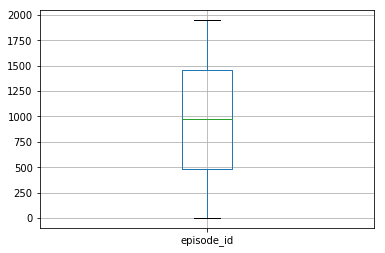

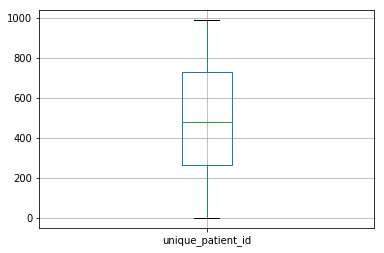

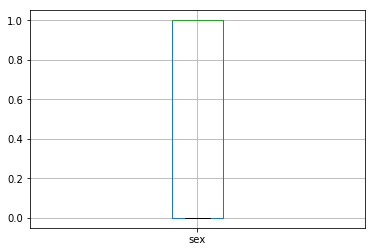

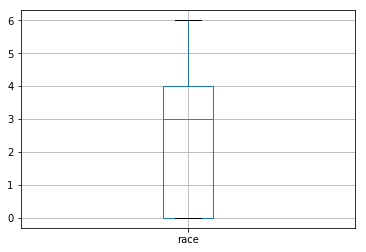

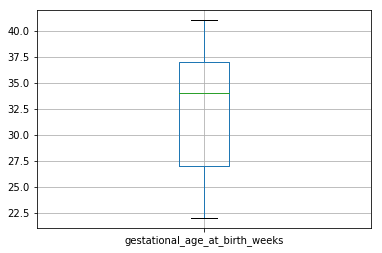

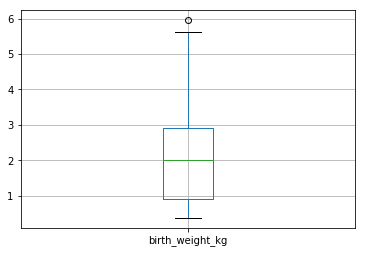

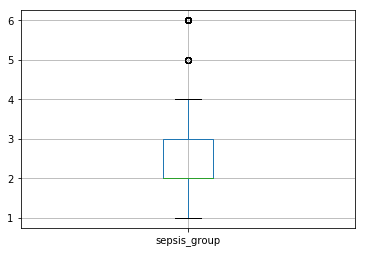

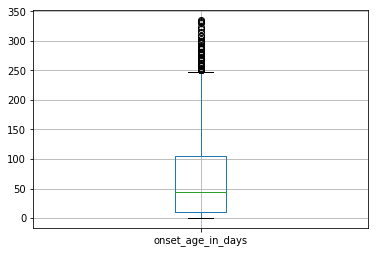

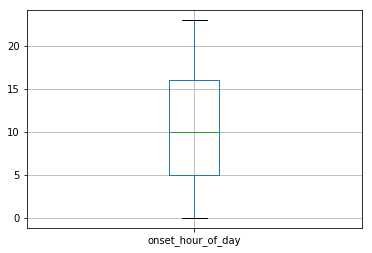

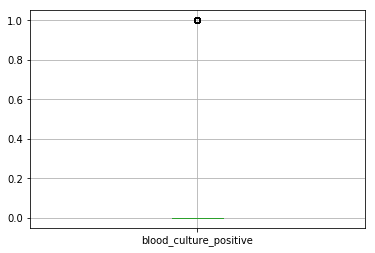

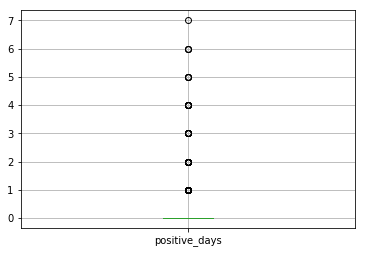

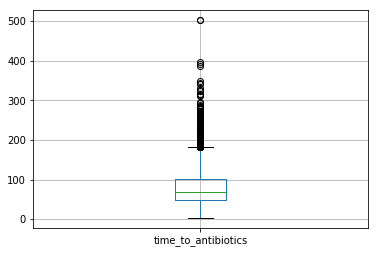

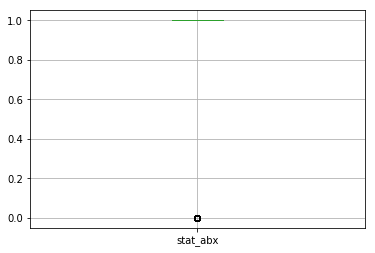

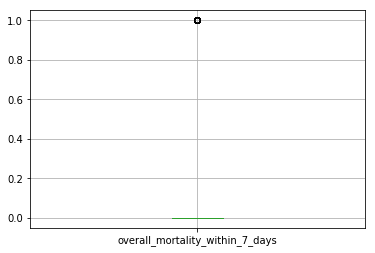

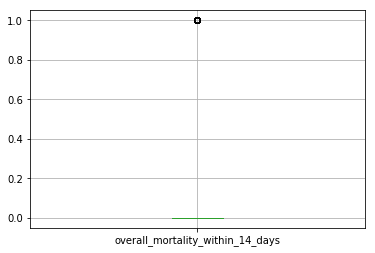

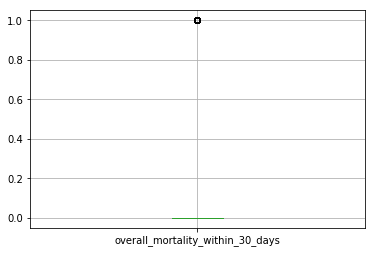

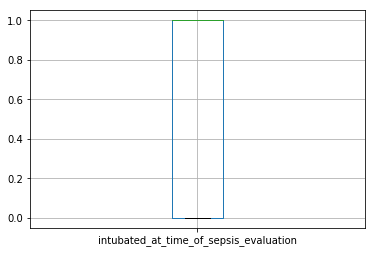

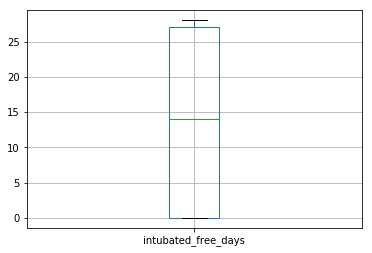

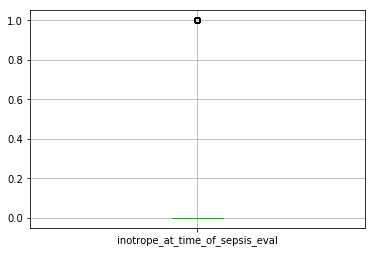

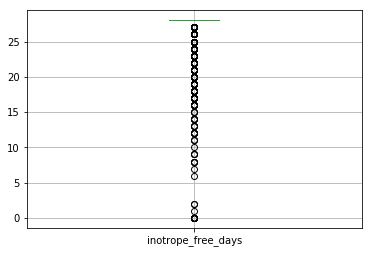

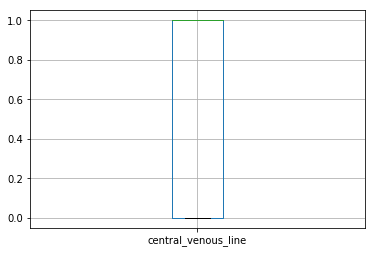

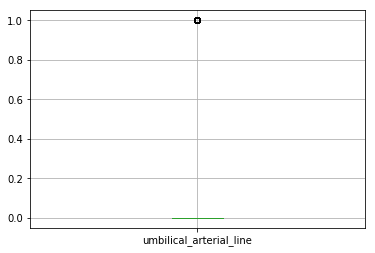

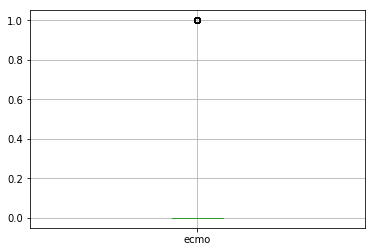

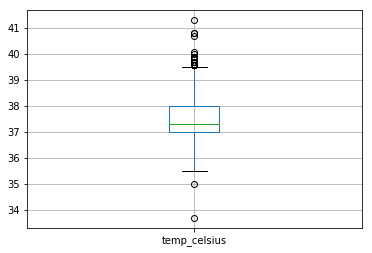

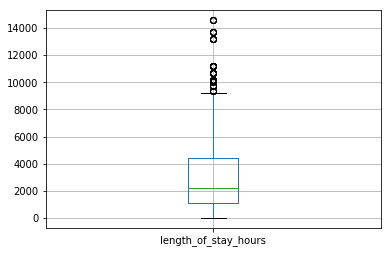

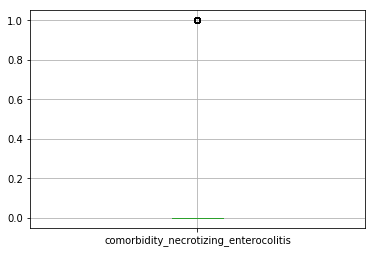

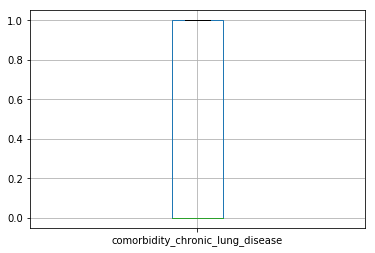

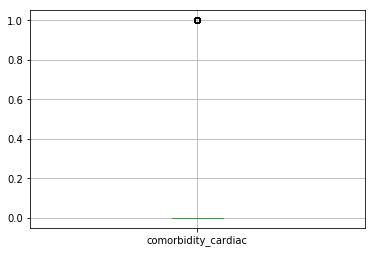

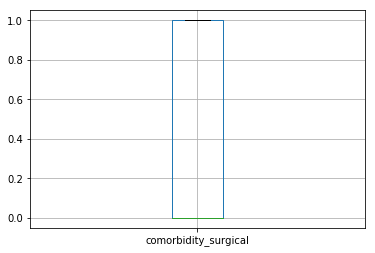

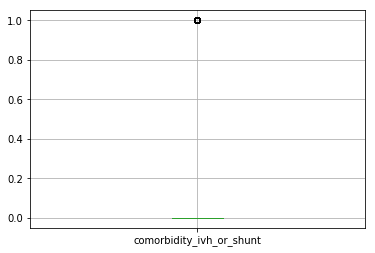

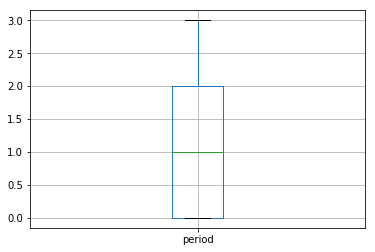

In [ ]:
for col in df:
    plt.figure()
    df.boxplot([col])

# 3. Data Distribution

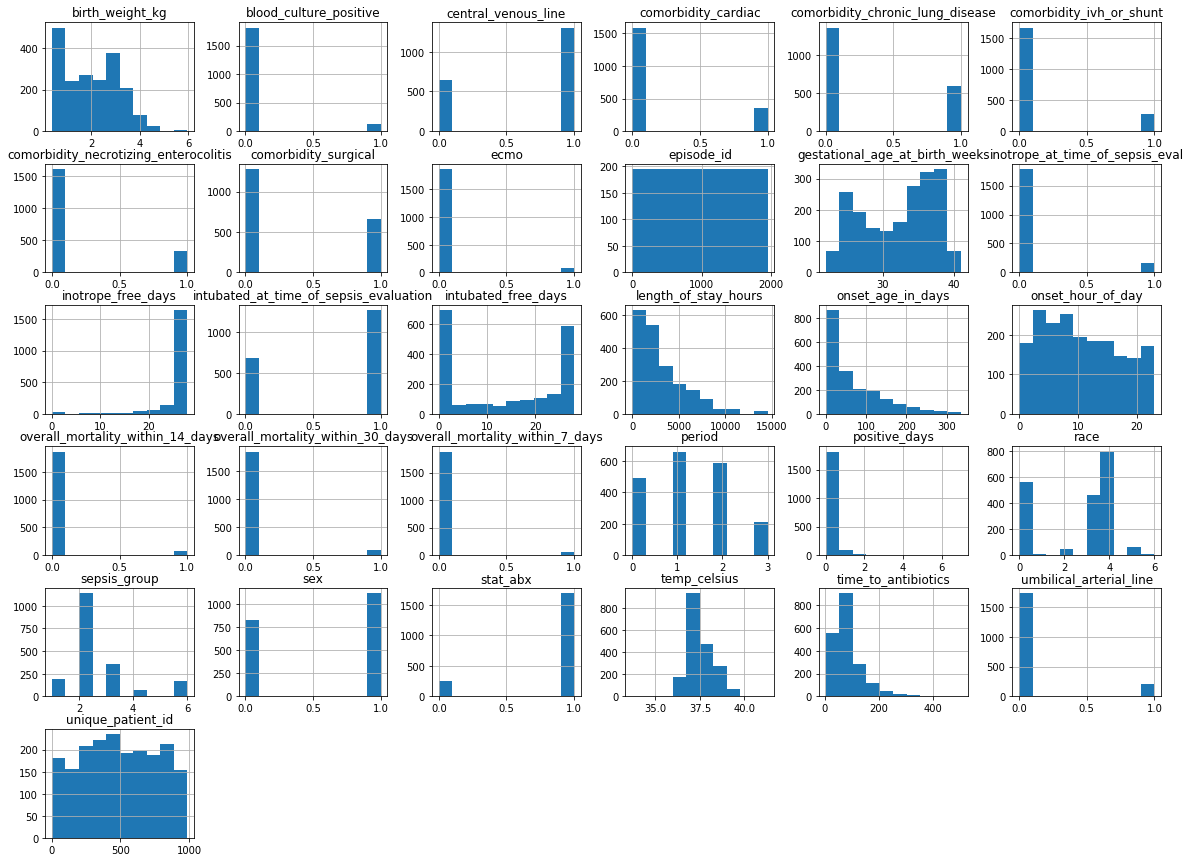

In [ ]:
num_bins = 10

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("histogram_plots")
plt.show()

# 4. Data Visualization

### Gender v/s Sepsis_Group

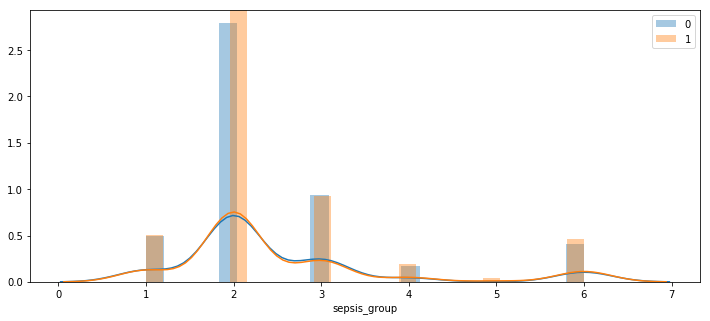

In [ ]:
# Distribution plot - depicts variation in data distribution
plt.figure(figsize=(12,5))
sns.distplot(df["sepsis_group"][df["sex"]==0])
sns.distplot(df["sepsis_group"][df["sex"]==1])
plt.legend(['0','1'])
plt.show()

## Mortality Rate

### 0 - NO
### 1 - YES

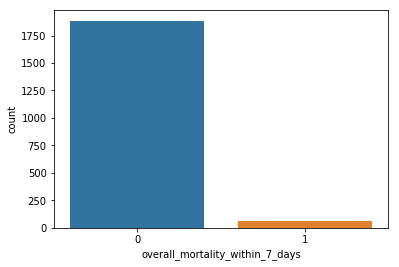

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['overall_mortality_within_7_days'])
plt.show()

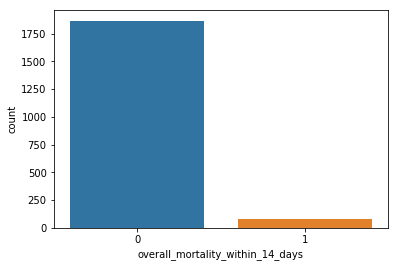

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['overall_mortality_within_14_days'])
plt.show()

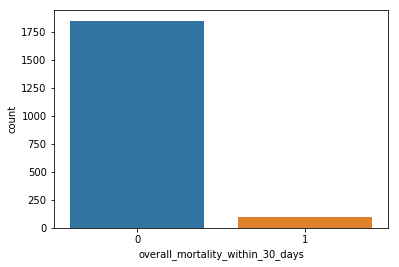

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['overall_mortality_within_30_days'])
plt.show()

## Chances for following disease present at any time before sepsis evaluation

### 0 - NO
### 1 - YES

### Necrotizing enterocolitis - intestinal disease among premature infants

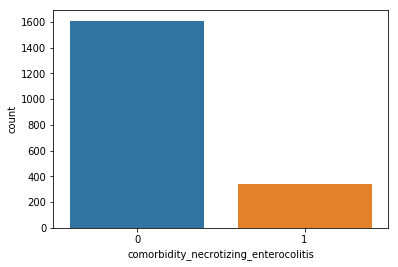

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['comorbidity_necrotizing_enterocolitis'])
plt.show()

### Serious chronic lung and respiratory disease in premature infants

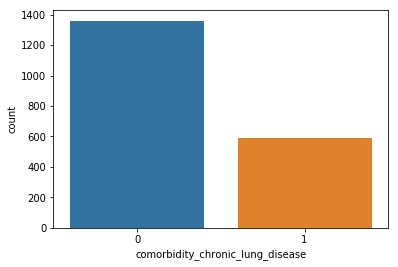

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['comorbidity_chronic_lung_disease'])
plt.show()

### Cardiovascular disease

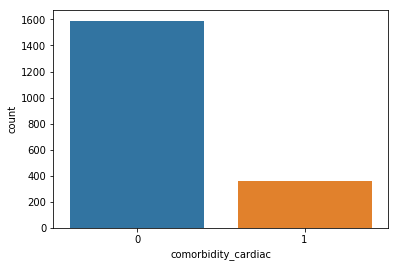

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['comorbidity_cardiac'])
plt.show()

### Complex non-cardiac surgical disease such as congenital diaphragmatic hernia, gastroschisis, spina bifida, encephalocele, etc 

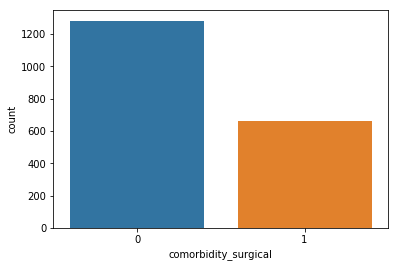

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['comorbidity_surgical'])
plt.show()

### Presence of intraventricular hemorrhage or ventriculo-peritoneal shunt

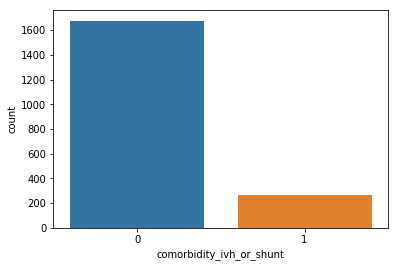

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['comorbidity_ivh_or_shunt'])
plt.show()

### Race

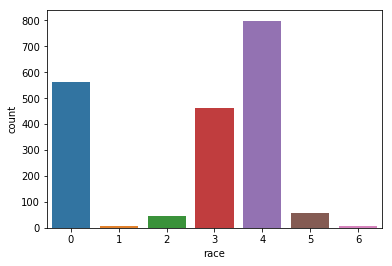

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['race'])
plt.show()

### Rate at which ay particular race gets affected by a sepsis group

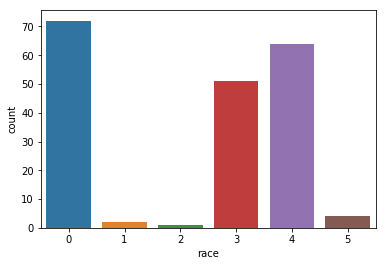

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['race'][df['sepsis_group']==1])
plt.show()

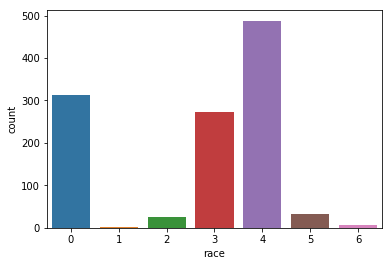

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['race'][df['sepsis_group']==2])
plt.show()

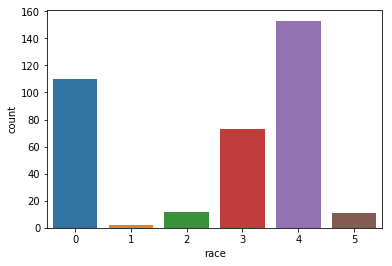

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['race'][df['sepsis_group']==3])
plt.show()

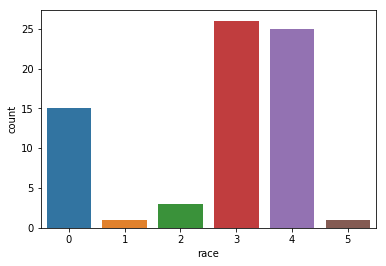

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['race'][df['sepsis_group']==4])
plt.show()

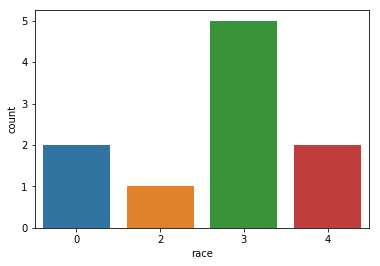

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['race'][df['sepsis_group']==5])
plt.show()

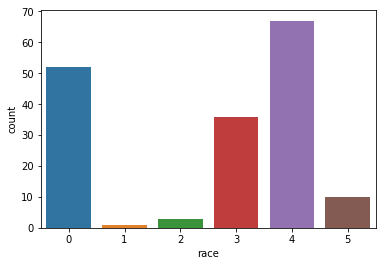

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['race'][df['sepsis_group']==6])
plt.show()

# 5. Feature Selection

## Heatmap
### Red - Maximum correlation
### Blue - Minimum correlation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <a list of 31 Text xticklabel objects>)

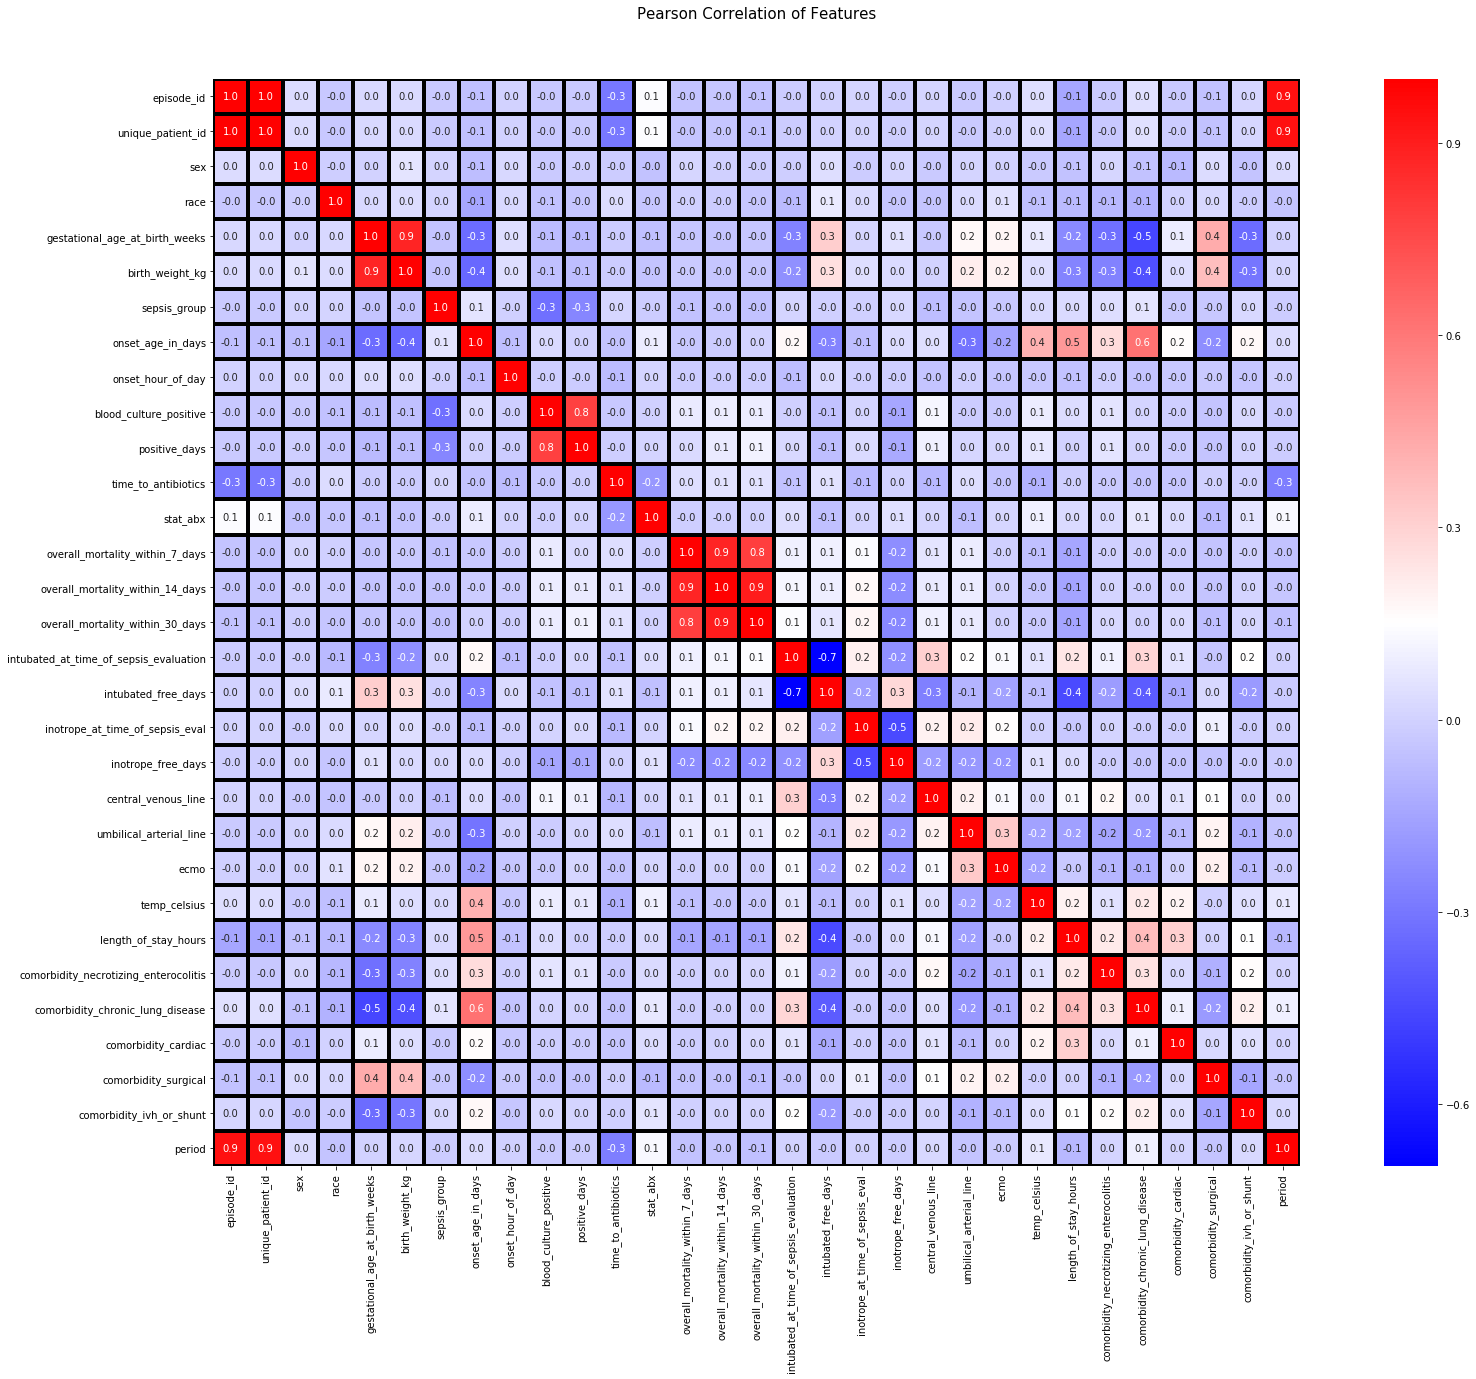

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlations = df.corr()
colormap = plt.cm.viridis
plt.figure(figsize=(30,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data = correlations, square = True, annot=True, cmap = "bwr", fmt='.1f', linewidths=3, linecolor='black')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
#plt.savefig('svm_conf.png', dpi=400)

In [ ]:
df = df.drop('overall_mortality_within_7_days', axis=1)

In [ ]:
df = df.drop('overall_mortality_within_14_days', axis=1)

In [ ]:
df.shape

(1946, 29)

In [ ]:
X = df.drop('overall_mortality_within_30_days', axis=1)
y = df.overall_mortality_within_30_days

## Pearson Correlation

In [ ]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,20)
print(str(len(cor_feature)), 'selected features')

20 selected features


In [ ]:
#X = df[cor_feature]

## Chi-Squared

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [ ]:
#X = df[chi_feature]

## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=20, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 28 features.
20 selected features


In [ ]:
#X = df[rfe_feature]

## Lasso

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=20)
embeded_lr_selector.fit(X, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

9 selected features


C:\Users\Priti\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#X = df[embeded_lr_feature]

## Tree Based - Select From Model

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=20)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

10 selected features


In [ ]:
#X = df[embeded_rf_feature]

## LightGBM Feature Importances Attribute

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=20)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

8 selected features


In [ ]:
#X = df[embeded_lgb_feature]

In [ ]:
feature_name = list(X.columns)

In [ ]:
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(28)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,intubated_free_days,True,True,True,True,True,True,6
2,time_to_antibiotics,True,True,True,False,True,True,5
3,length_of_stay_hours,True,True,True,False,True,True,5
4,inotrope_free_days,True,True,True,True,True,False,5
5,unique_patient_id,True,True,False,False,True,True,4
6,temp_celsius,True,False,True,True,True,False,4
7,sepsis_group,True,True,True,True,False,False,4
8,race,True,True,True,True,False,False,4
9,intubated_at_time_of_sepsis_evaluation,True,True,True,True,False,False,4
10,inotrope_at_time_of_sepsis_eval,True,True,True,True,False,False,4


### Yellow - Top Positive Features
### Green - Top Negative Features

28
['birth_weight_kg', 'blood_culture_positive', 'central_venous_line', 'comorbidity_cardiac', 'comorbidity_chronic_lung_disease', 'comorbidity_ivh_or_shunt', 'comorbidity_necrotizing_enterocolitis', 'comorbidity_surgical', 'ecmo', 'episode_id', 'gestational_age_at_birth_weeks', 'inotrope_at_time_of_sepsis_eval', 'inotrope_free_days', 'intubated_at_time_of_sepsis_evaluation', 'intubated_free_days', 'length_of_stay_hours', 'onset_age_in_days', 'onset_hour_of_day', 'period', 'positive_days', 'race', 'sepsis_group', 'sex', 'stat_abx', 'temp_celsius', 'time_to_antibiotics', 'umbilical_arterial_line', 'unique_patient_id']
['birth_weight_kg' 'blood_culture_positive' 'central_venous_line'
 'comorbidity_cardiac' 'comorbidity_chronic_lung_disease'
 'comorbidity_ivh_or_shunt' 'comorbidity_necrotizing_enterocolitis'
 'comorbidity_surgical' 'ecmo' 'episode_id'
 'gestational_age_at_birth_weeks' 'inotrope_at_time_of_sepsis_eval'
 'inotrope_free_days' 'intubated_at_time_of_sepsis_evaluation'
 'intuba

C:\Users\Priti\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


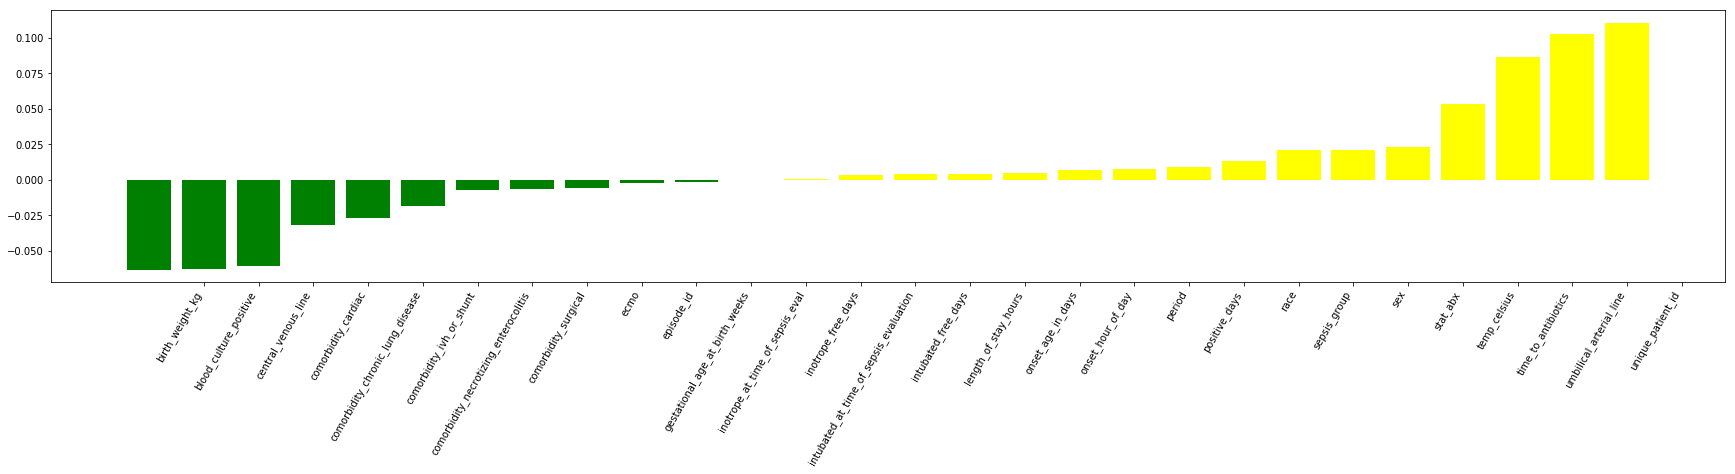

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
def plot_coefficients(classifier, feature_names, top_features=14):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(30, 5))
 colors = ['green' if c < 0 else 'yellow' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 print(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names,  rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(X)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(X, y)
plot_coefficients(svm, cv.get_feature_names())

In [ ]:
X = df[['intubated_at_time_of_sepsis_evaluation',
 'intubated_free_days', 'length_of_stay_hours', 'onset_age_in_days',
 'onset_hour_of_day', 'period', 'positive_days', 'race', 'sepsis_group', 'sex',
 'stat_abx', 'temp_celsius', 'time_to_antibiotics', 'umbilical_arterial_line',
 'unique_patient_id']]

In [ ]:
X.shape

(1946, 15)

In [ ]:
y.shape

(1946,)

# Machine Learning Models

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *

In [ ]:
(df['overall_mortality_within_30_days'].value_counts()/1946)*100

0    95.015416
1     4.984584
Name: overall_mortality_within_30_days, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

## XG Boost Classifier

In [ ]:
model = XGBClassifier(seed=7, n_jobs=-1, n_estimators=100, random_state=7, max_depth=2, learning_rate=0.1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=7,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 95.89%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 Score = ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(y_test, y_pred, average="macro"))  

F1 Score =  0.6893617021276596
Precision Score =  0.9244444444444444
Recall Score =  0.6281280989325089


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[552   1]
 [ 23   8]]


## Random Forest Classifier

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=7, min_samples_leaf=5)

In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 95.21%


In [ ]:
print("F1 Score = ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(y_test, y_pred, average="macro"))  

F1 Score =  0.5758896151053013
Precision Score =  0.9759036144578312
Recall Score =  0.5483870967741935


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[553   0]
 [ 28   3]]


## Light Gradient Boosting Machine

In [ ]:
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=7, n_estimators=100, colsample_bytree=0.5, 
                       max_depth=2, learning_rate=0.1, boosting_type='gbdt')
lgbmc.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5, max_depth=2, random_state=7)

In [ ]:
y_pred = lgbmc.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 96.06%


In [ ]:
print("F1 Score = ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(y_test, y_pred, average="macro"))  

F1 Score =  0.6949421998137675
Precision Score =  0.9800347222222222
Recall Score =  0.6290322580645161


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[553   0]
 [ 23   8]]


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=10,max_iter=750,random_state=52)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=750, random_state=52)

In [ ]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.945


In [ ]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 94.52%


In [ ]:
print("F1 Score = ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(y_test, y_pred, average="macro"))  

F1 Score =  0.5414212799371809
Precision Score =  0.6749568221070812
Recall Score =  0.5295455871201074


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[550   3]
 [ 29   2]]


## SVM

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 95.21%


In [ ]:
print("F1 Score = ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(y_test, y_pred, average="macro"))  

F1 Score =  0.5987436199450333
Precision Score =  0.8766839378238342
Recall Score =  0.5636119699002509


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[552   1]
 [ 27   4]]


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Accuracy = ", accuracy_score(y_test, model.predict(X_test)))

Accuracy =  0.9246575342465754


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("F1 Score = ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(y_test, y_pred, average="macro"))  

F1 Score =  0.6252697894184215
Precision Score =  0.6252697894184215
Recall Score =  0.6252697894184215


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[531  22]
 [ 22   9]]


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Accuracy = ", accuracy_score(y_test, neigh.predict(X_test)))

Accuracy =  0.9315068493150684


In [ ]:
y_pred = neigh.predict(X_test)

In [ ]:
print("F1 Score = ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(y_test, y_pred, average="macro"))  

F1 Score =  0.4822695035460992
Precision Score =  0.47304347826086957
Recall Score =  0.4918625678119349


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[544   9]
 [ 31   0]]


## Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Accuracy = ",accuracy_score(y_test, clf.predict(X_test)))

Accuracy =  0.934931506849315


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("F1 Score = ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(y_test, y_pred, average="macro"))  

F1 Score =  0.6436279547790339
Precision Score =  0.6603220035778175
Recall Score =  0.6306947442104649


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[537  16]
 [ 22   9]]


## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
print("Accuracy = ",accuracy_score(y_test, clf.predict(X_test)))

Accuracy =  0.9486301369863014


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("F1 Score = ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(y_test, y_pred, average="macro"))  

F1 Score =  0.5455960161842515
Precision Score =  0.8083763625932301
Recall Score =  0.5313539053841217


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[552   1]
 [ 29   2]]


# Handling Data Imbalance

In [ ]:
from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn import linear_model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy.random import RandomState
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_palette(['#06B1F0', '#FC4B60'])
random_seed = 63445
df = pd.read_csv(r'deid-nicu-sepsis-tta.csv')


import warnings
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN

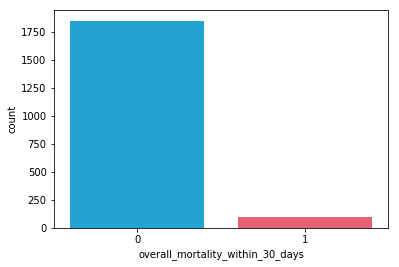

In [ ]:
sns.countplot(df['overall_mortality_within_30_days'])
plt.show()

## Oversampling using Adaptive Synthetic Sampling Approach(ADASYN)

In [ ]:
X.shape

(1946, 15)

In [ ]:
def makeOverSamplesADASYN(X,Y):
    from imblearn.over_sampling import ADASYN 
    sm = ADASYN()
    X, Y = sm.fit_sample(X, Y)
    return(X,Y)

X , Y = makeOverSamplesADASYN(X, y)
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (3682, 15)
Shape of Y: (3682,)


In [ ]:
def count1(Y):
    countzero=0
    countone=0
    for i in range(0,len(Y)):
        if Y[i]==0:
            countzero=countzero+1
        elif Y[i]==1:
            countone=countone+1
    return countzero,countone

class0, class1 = count1(Y)

In [ ]:
print(class0,class1)

1849 1833


In [ ]:
X = np.floor(X).astype(int)

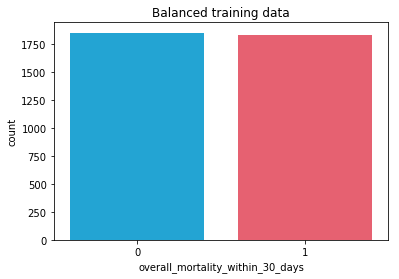

In [ ]:
sns.countplot(Y)
plt.title('Balanced training data')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.3)

### Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
test_preds = model.predict(X_test)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))

Accuracy score: 0.7909502262443439
Recall score: 0.7467652495378928
Precision score: 0.8112449799196787
f1-score: 0.7776708373435995


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
test_preds = model.predict(X_test)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))

Accuracy score: 0.7900452488687782
Recall score: 0.8354898336414048
Precision score: 0.7596638655462185
f1-score: 0.795774647887324


### SVM

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [ ]:
test_preds = model.predict(X_test)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))

Accuracy score: 0.644343891402715
Recall score: 0.7319778188539742
Precision score: 0.6149068322981367
f1-score: 0.668354430379747


## SMOTENN

In [ ]:
X.shape

(1946, 15)

In [ ]:
def makeunderoverSample(X,Y):
    from imblearn.combine import SMOTEENN
    sm = SMOTEENN(random_state=0)
    X, Y = sm.fit_resample(X, Y)
    return(X,Y)

X , Y = makeunderoverSample(X,y)
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (3039, 15)
Shape of Y: (3039,)


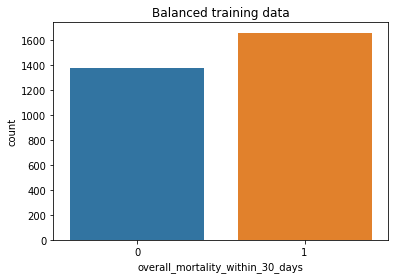

In [ ]:
sns.countplot(Y)
plt.title('Balanced training data')
plt.show()

In [ ]:
def count1(Y):
    countzero=0
    countone=0
    for i in range(0,len(Y)):
        if Y[i]==0:
            countzero=countzero+1
        elif Y[i]==1:
            countone=countone+1
    return countzero,countone

class0, class1 = count1(Y)

In [ ]:
print(class0,class1)

1379 1660


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.3)

# Naive Bayes

In [ ]:
from sklearn.metrics import log_loss
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
test_preds = model.predict(X_test)
loss = log_loss(y_test, test_preds)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.7960526315789473
Recall score: 0.7913223140495868
Precision score: 0.8183760683760684
f1-score: 0.8046218487394958
Log Loss / Cross Entropy = 7.0442


Confusion matrix:
 [[343  85]
 [101 383]]


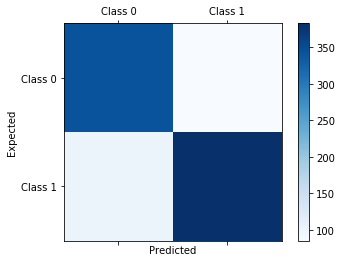

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=test_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
preds =  model.predict(X_train)
loss = log_loss(y_train, preds)
print ('Accuracy score: {}'.format(accuracy_score(y_train, preds)))
print ('Recall score: {}'.format(recall_score(y_train, preds)))
print ('Precision score: {}'.format(precision_score(y_train, preds)))
print ('f1-score: {}'.format(f1_score(y_train, preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.8171133051245886
Recall score: 0.8324829931972789
Precision score: 0.8360375747224594
f1-score: 0.8342564976565828
Log Loss / Cross Entropy = 6.3168


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
test_preds = model.predict(X_test)
loss = log_loss(y_test, test_preds)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.8453947368421053
Recall score: 0.890495867768595
Precision score: 0.8304431599229287
f1-score: 0.8594217347956131
Log Loss / Cross Entropy = 5.3400


Confusion matrix:
 [[340  88]
 [ 53 431]]


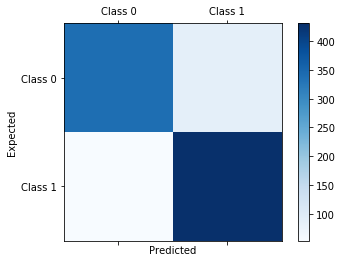

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=test_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
preds = model.predict(X_train)
loss = log_loss(y_train, preds)
print ('Accuracy score: {}'.format(accuracy_score(y_train, preds)))
print ('Recall score: {}'.format(recall_score(y_train, preds)))
print ('Precision score: {}'.format(precision_score(y_train, preds)))
print ('f1-score: {}'.format(f1_score(y_train, preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.8608368594264222
Recall score: 0.9132653061224489
Precision score: 0.8470031545741324
f1-score: 0.878887070376432
Log Loss / Cross Entropy = 4.8066


# SVM

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [ ]:
test_preds = model.predict(X_test)
loss = log_loss(y_test, test_preds)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.6776315789473685
Recall score: 0.878099173553719
Precision score: 0.6439393939393939
f1-score: 0.743006993006993
Log Loss / Cross Entropy = 11.1344


Confusion matrix:
 [[193 235]
 [ 59 425]]


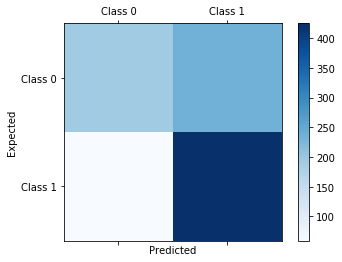

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=test_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
preds = model.predict(X_train)
loss = log_loss(y_train, preds)
print ('Accuracy score: {}'.format(accuracy_score(y_train, preds)))
print ('Recall score: {}'.format(recall_score(y_train, preds)))
print ('Precision score: {}'.format(precision_score(y_train, preds)))
print ('f1-score: {}'.format(f1_score(y_train, preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.686412787964269
Recall score: 0.8971088435374149
Precision score: 0.6589631480324797
f1-score: 0.7598127475693194
Log Loss / Cross Entropy = 10.8311


# XG BOOST Classifier

In [ ]:
model = XGBClassifier(seed=7, n_jobs=-1, n_estimators=100, random_state=7, max_depth=2, learning_rate=0.1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=7,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
test_preds = model.predict(X_test)
loss = log_loss(y_test, test_preds)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9506578947368421
Recall score: 0.9896694214876033
Precision score: 0.9229287090558767
f1-score: 0.9551345962113658
Log Loss / Cross Entropy = 1.7043


Confusion matrix:
 [[388  40]
 [  5 479]]


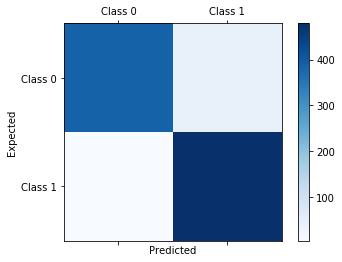

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=test_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
preds = model.predict(X_train)
loss = log_loss(y_train, preds)
print ('Accuracy score: {}'.format(accuracy_score(y_train, preds)))
print ('Recall score: {}'.format(recall_score(y_train, preds)))
print ('Precision score: {}'.format(precision_score(y_train, preds)))
print ('f1-score: {}'.format(f1_score(y_train, preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9670897978373296
Recall score: 0.9931972789115646
Precision score: 0.9495934959349593
f1-score: 0.9709060681629261
Log Loss / Cross Entropy = 1.1367


# Radom Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=7, min_samples_leaf=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=500, n_jobs=-1,
                       random_state=7)

In [ ]:
test_preds = rfc.predict(X_test)
loss = log_loss(y_test, test_preds)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9627192982456141
Recall score: 0.9793388429752066
Precision score: 0.9518072289156626
f1-score: 0.965376782077393
Log Loss / Cross Entropy = 1.2877


Confusion matrix:
 [[404  24]
 [ 10 474]]


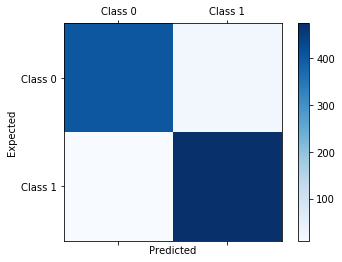

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=test_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
preds = rfc.predict(X_train)
loss = log_loss(y_train, preds)
print ('Accuracy score: {}'.format(accuracy_score(y_train, preds)))
print ('Recall score: {}'.format(recall_score(y_train, preds)))
print ('Precision score: {}'.format(precision_score(y_train, preds)))
print ('f1-score: {}'.format(f1_score(y_train, preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9877762106252939
Recall score: 0.9957482993197279
Precision score: 0.9823825503355704
f1-score: 0.9890202702702703
Log Loss / Cross Entropy = 0.4222


# Light Gradient Boosting Classifier

In [ ]:
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=7, n_estimators=100, colsample_bytree=0.5, 
                       max_depth=2, learning_rate=0.1, boosting_type='gbdt')
lgbmc.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5, max_depth=2, random_state=7)

In [ ]:
test_preds = lgbmc.predict(X_test)
loss = log_loss(y_test, test_preds)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9473684210526315
Recall score: 0.9855371900826446
Precision score: 0.9208494208494209
f1-score: 0.9520958083832336
Log Loss / Cross Entropy = 1.8179


Confusion matrix:
 [[387  41]
 [  7 477]]


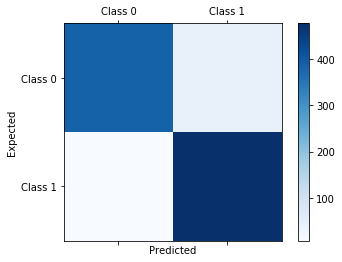

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=test_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
preds = lgbmc.predict(X_train)
loss = log_loss(y_train, preds)
print ('Accuracy score: {}'.format(accuracy_score(y_train, preds)))
print ('Recall score: {}'.format(recall_score(y_train, preds)))
print ('Precision score: {}'.format(precision_score(y_train, preds)))
print ('f1-score: {}'.format(f1_score(y_train, preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9685002350728726
Recall score: 0.9948979591836735
Precision score: 0.950446791226645
f1-score: 0.9721645201495638
Log Loss / Cross Entropy = 1.0880


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
test_preds = neigh.predict(X_test)
loss = log_loss(y_test, test_preds)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9703947368421053
Recall score: 0.9917355371900827
Precision score: 0.9542743538767395
f1-score: 0.9726443768996961
Log Loss / Cross Entropy = 1.0225


Confusion matrix:
 [[405  23]
 [  4 480]]


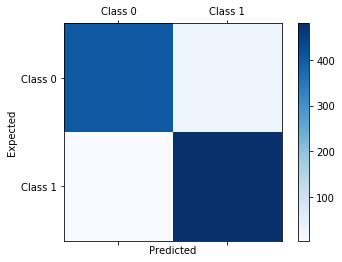

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=test_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
preds = neigh.predict(X_train)
loss = log_loss(y_train, preds)
print ('Accuracy score: {}'.format(accuracy_score(y_train, preds)))
print ('Recall score: {}'.format(recall_score(y_train, preds)))
print ('Precision score: {}'.format(precision_score(y_train, preds)))
print ('f1-score: {}'.format(f1_score(y_train, preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9929478138222849
Recall score: 0.9991496598639455
Precision score: 0.9882253994953742
f1-score: 0.9936575052854123
Log Loss / Cross Entropy = 0.2436


# Decision Tree Classifier

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
test_preds = clf.predict(X_test)
loss = log_loss(y_test, test_preds)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9671052631578947
Recall score: 0.9772727272727273
Precision score: 0.9613821138211383
f1-score: 0.9692622950819673
Log Loss / Cross Entropy = 1.1362


Confusion matrix:
 [[409  19]
 [ 11 473]]


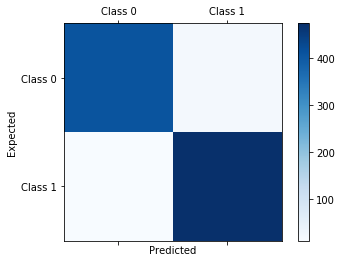

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=test_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
preds = clf.predict(X_train)
loss = log_loss(y_train, preds)
print ('Accuracy score: {}'.format(accuracy_score(y_train, preds)))
print ('Recall score: {}'.format(recall_score(y_train, preds)))
print ('Precision score: {}'.format(precision_score(y_train, preds)))
print ('f1-score: {}'.format(f1_score(y_train, preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 1.0
Recall score: 1.0
Precision score: 1.0
f1-score: 1.0
Log Loss / Cross Entropy = 0.0000


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
test_preds = clf.predict(X_test)
loss = log_loss(y_test, test_preds)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9484649122807017
Recall score: 0.9669421487603306
Precision score: 0.9378757515030061
f1-score: 0.9521871820956256
Log Loss / Cross Entropy = 1.7800


Confusion matrix:
 [[397  31]
 [ 16 468]]


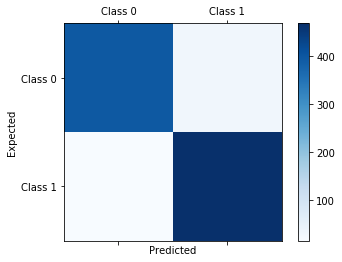

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=test_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
preds = clf.predict(X_train)
loss = log_loss(y_train, preds)
print ('Accuracy score: {}'.format(accuracy_score(y_train, preds)))
print ('Recall score: {}'.format(recall_score(y_train, preds)))
print ('Precision score: {}'.format(precision_score(y_train, preds)))
print ('f1-score: {}'.format(f1_score(y_train, preds)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy score: 0.9797837329572168
Recall score: 0.9914965986394558
Precision score: 0.9724770642201835
f1-score: 0.9818947368421054
Log Loss / Cross Entropy = 0.6983
